# Import libraries

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Load dataset &  data information


In [258]:
# read data
stroke_dataframe = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [259]:
stroke_dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [260]:
# dataframe shape
stroke_dataframe.shape

(5110, 12)

In [261]:
# dataframe info
stroke_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [262]:
# dataframe describe
stroke_dataframe.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [263]:
# dataframe columns
stroke_dataframe.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [264]:
# describe categorical  coulmns
stroke_dataframe.describe(include='object')


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [265]:
# describe numerical  coulmns
stroke_dataframe.describe(include='number')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data cleaning

In [266]:
# delete ID column (not necessary)
stroke_dataframe.drop('id', axis=1, inplace=True)


In [267]:
# check unknown values
unknown_smoking_count=stroke_dataframe[stroke_dataframe['smoking_status'] == 'Unknown'].shape[0]
print(f"The word 'Unknown' appears {unknown_smoking_count} times in the 'smoking_status' column.")

The word 'Unknown' appears 1544 times in the 'smoking_status' column.


In [268]:
# handling unkown values
stroke_dataframe.replace('Unknown','Passive Smoker', inplace=True)
stroke_dataframe['gender'] = stroke_dataframe['gender'].replace('Other','Male')

In [269]:
#check for missing values
print(stroke_dataframe.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [270]:
#filling the missing values of the data
stroke_dataframe['bmi'].fillna(stroke_dataframe['bmi'].mean(), inplace=True)

/tmp/ipython-input-2716273290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_dataframe['bmi'].fillna(stroke_dataframe['bmi'].mean(), inplace=True)


In [271]:
# check duplicated values
stroke_dataframe.duplicated().sum()

np.int64(0)

#check outliers



In [272]:
numeric_cols = stroke_dataframe.select_dtypes(include='number').columns
object_cols = stroke_dataframe.select_dtypes(include='object').columns
binary_cols = [col for col in stroke_dataframe.columns if stroke_dataframe[col].nunique()==2]
categorical_cols = [col for col in object_cols if col not in binary_cols]
numerical_cols = [col for col in numeric_cols if col not in binary_cols]


for col in numerical_cols:
    Q1 = stroke_dataframe[col].quantile(0.25)
    Q3 = stroke_dataframe[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = stroke_dataframe[(stroke_dataframe[col] < lower_bound) | (stroke_dataframe[col] > upper_bound)]

    # Print result
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(40*"-")


Column: age
Number of outliers: 0
----------------------------------------
Column: avg_glucose_level
Number of outliers: 627
----------------------------------------
Column: bmi
Number of outliers: 126
----------------------------------------


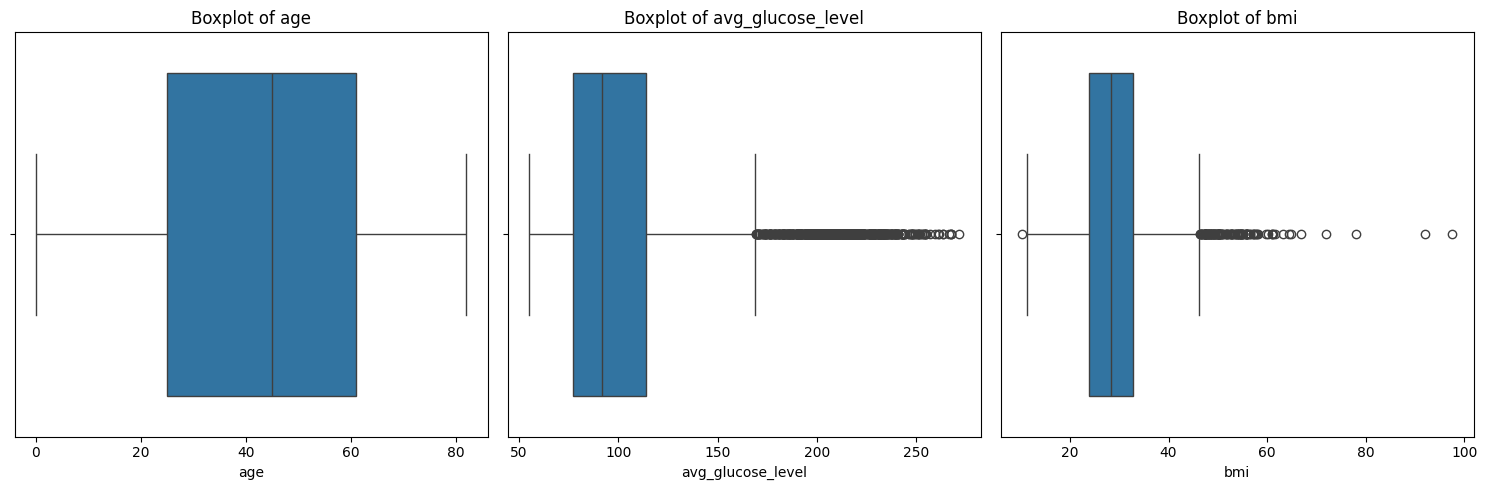

In [273]:
num_cols = len(numerical_cols)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=stroke_dataframe[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [274]:
def remove_outliers_iqr(stroke_dataframe, column):
    Q1 = stroke_dataframe[column].quantile(0.25)
    Q3 = stroke_dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return stroke_dataframe[(stroke_dataframe[column] >= lower_bound) & (stroke_dataframe[column] <=upper_bound)]

for i in numerical_cols:
    stroke_dataframe = remove_outliers_iqr(stroke_dataframe, i)
print("Dataset size after removing outliers:", stroke_dataframe.shape)


Dataset size after removing outliers: (4383, 11)


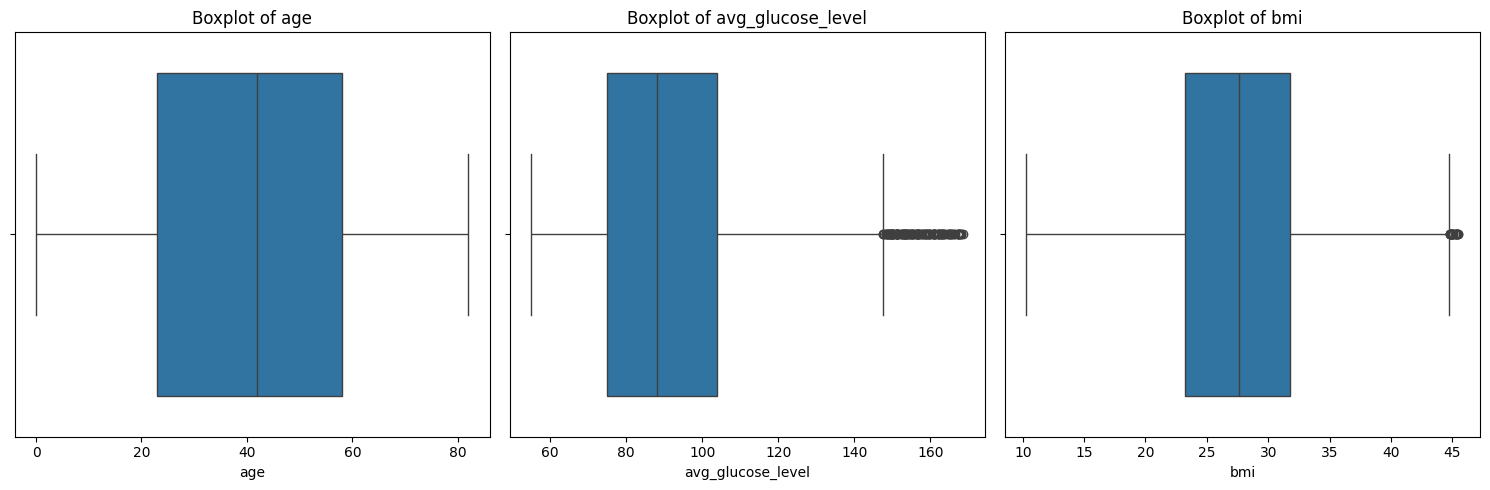

In [275]:
num_cols = len(numerical_cols)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=stroke_dataframe[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Exploration EDA

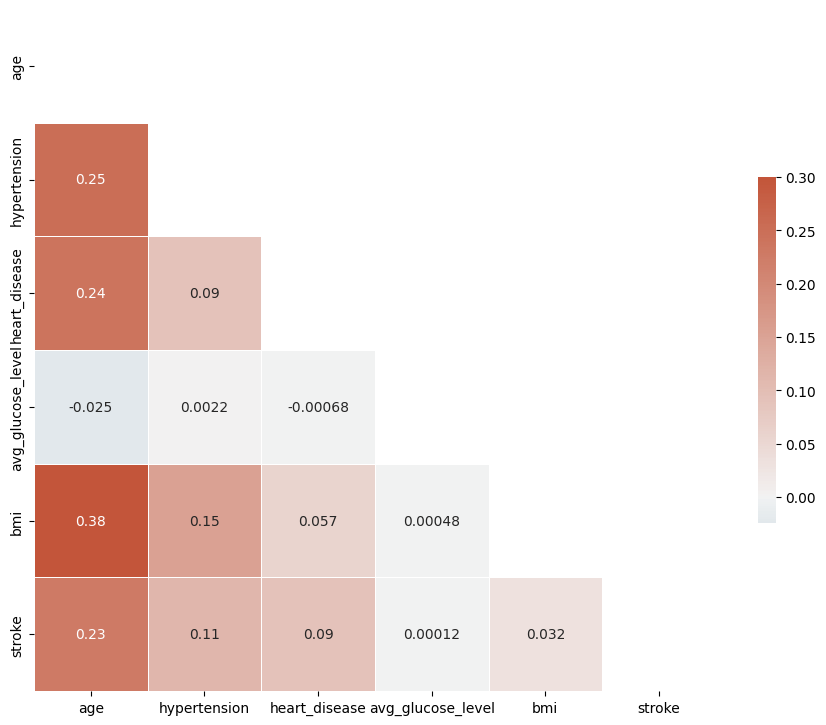

In [276]:
# Select numerical columns
numerical_df = stroke_dataframe.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True)

plt.show()

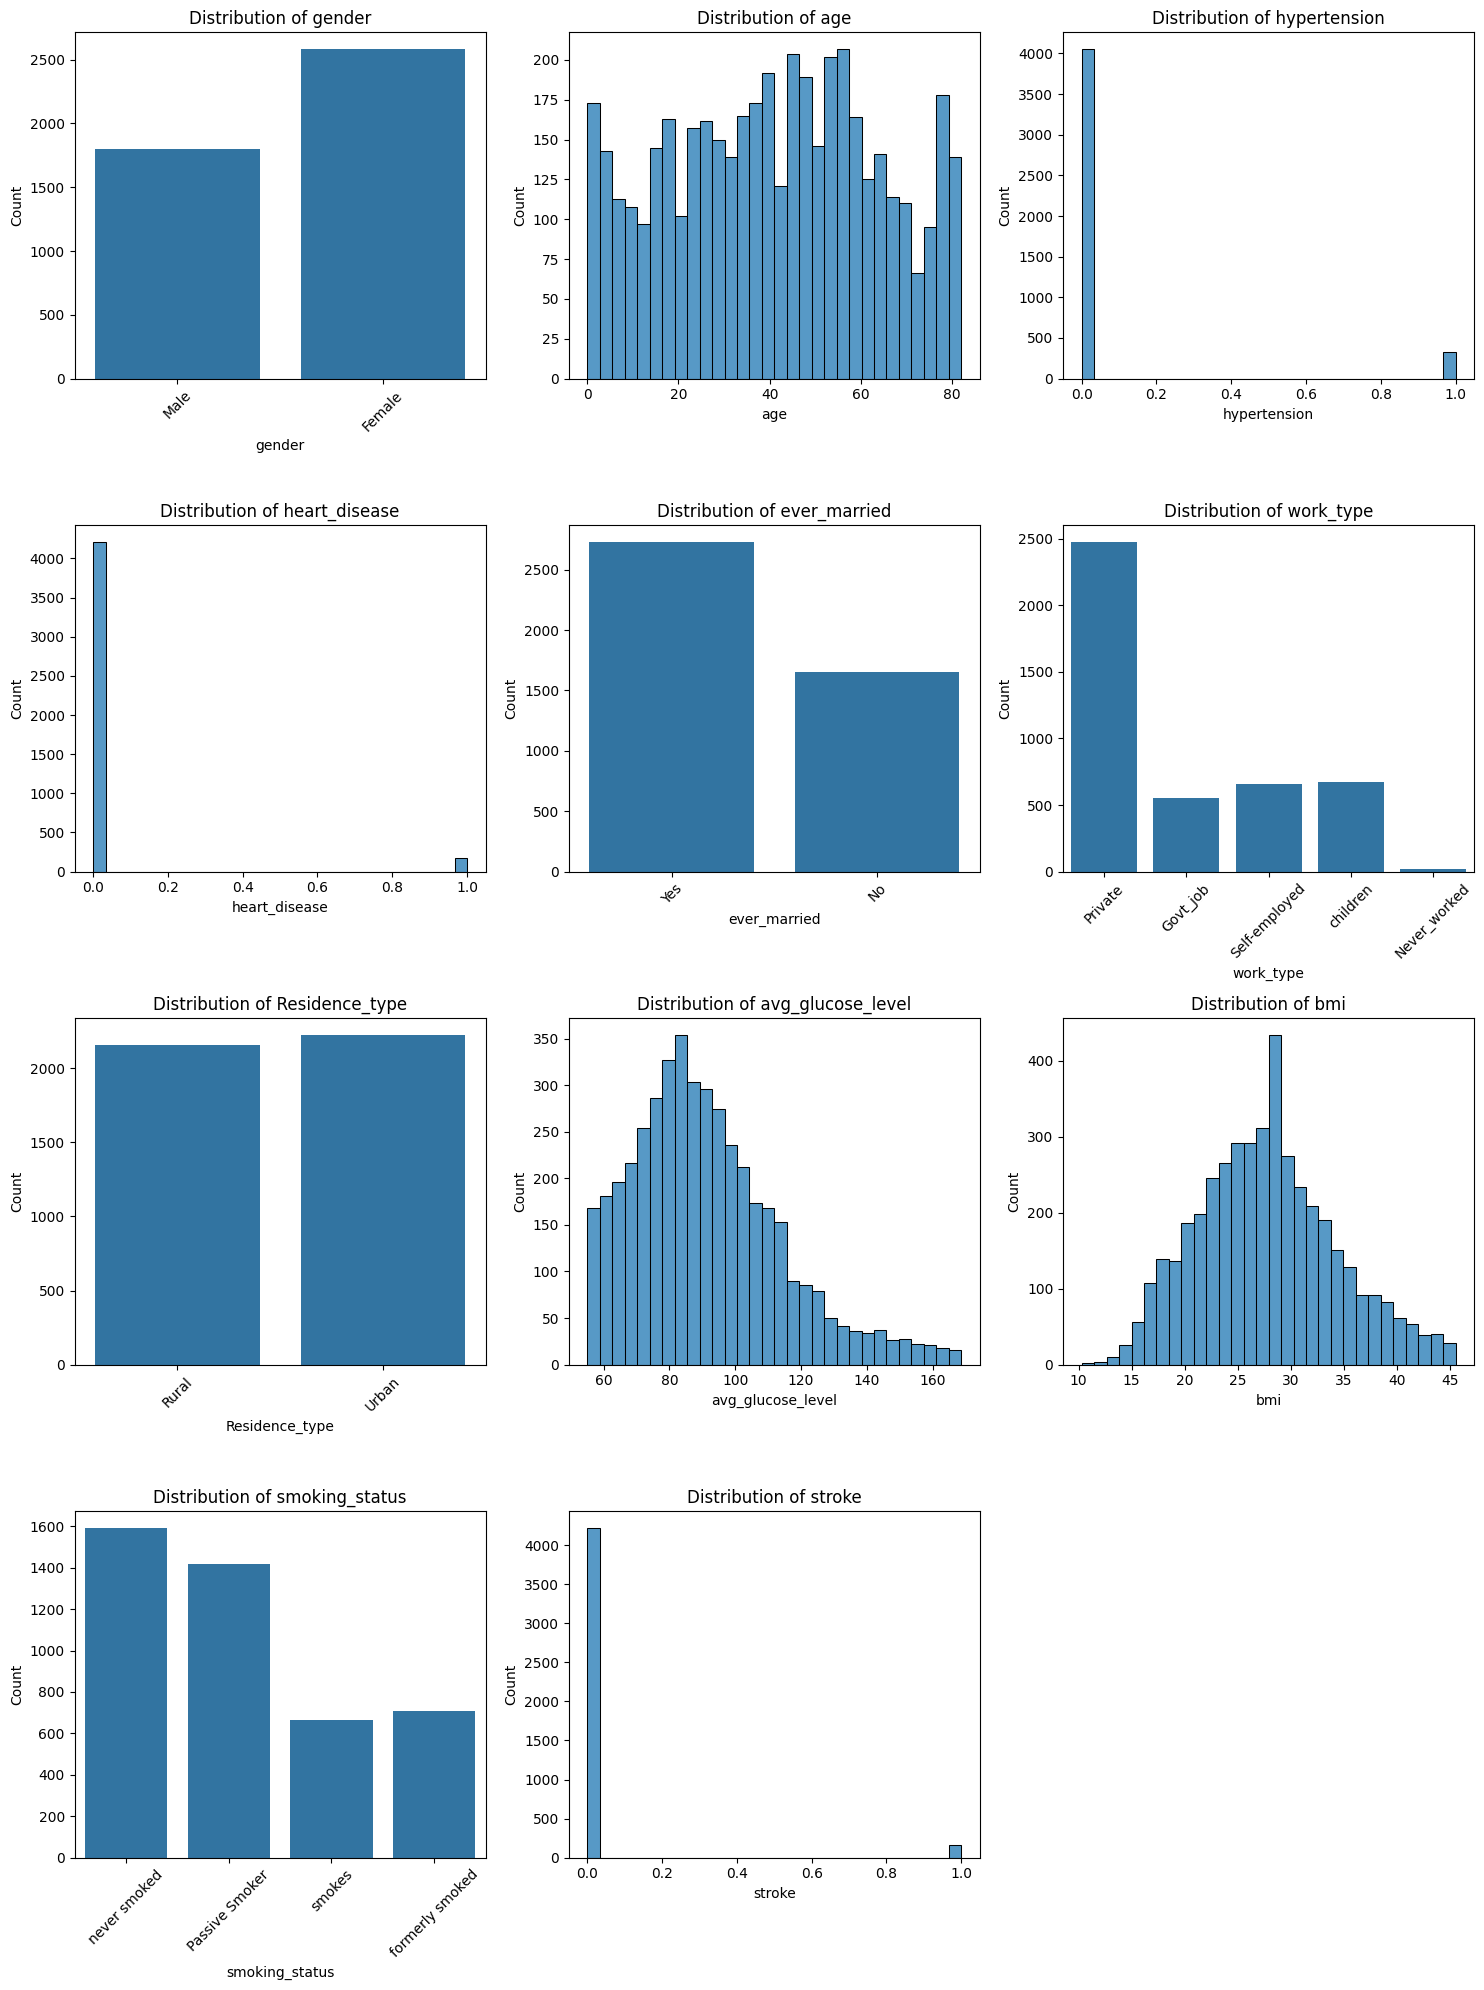

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = [col for col in stroke_dataframe.columns if stroke_dataframe[col].nunique() < 20 or stroke_dataframe[col].dtype != 'object']

cols_per_row = 3
rows = math.ceil(len(cols) / cols_per_row)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)


    if stroke_dataframe[col].dtype in ['int64', 'float64']:
        sns.histplot(data=stroke_dataframe, x=col, bins=30)
    else:

        sns.countplot(data=stroke_dataframe, x=col)
        plt.xticks(rotation=45)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3413925022.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=stroke_dataframe, x='age', y='stroke', estimator='mean', ci=None, color='blue')


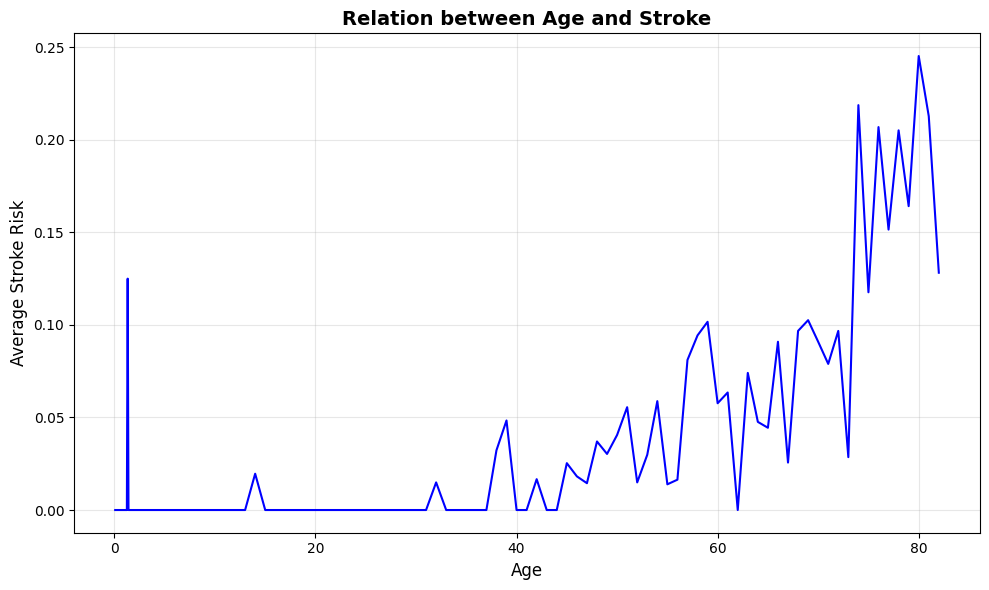

In [278]:
plt.figure(figsize=(10,6))
sns.lineplot(data=stroke_dataframe, x='age', y='stroke', estimator='mean', ci=None, color='blue')

plt.title('Relation between Age and Stroke', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Stroke Risk', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


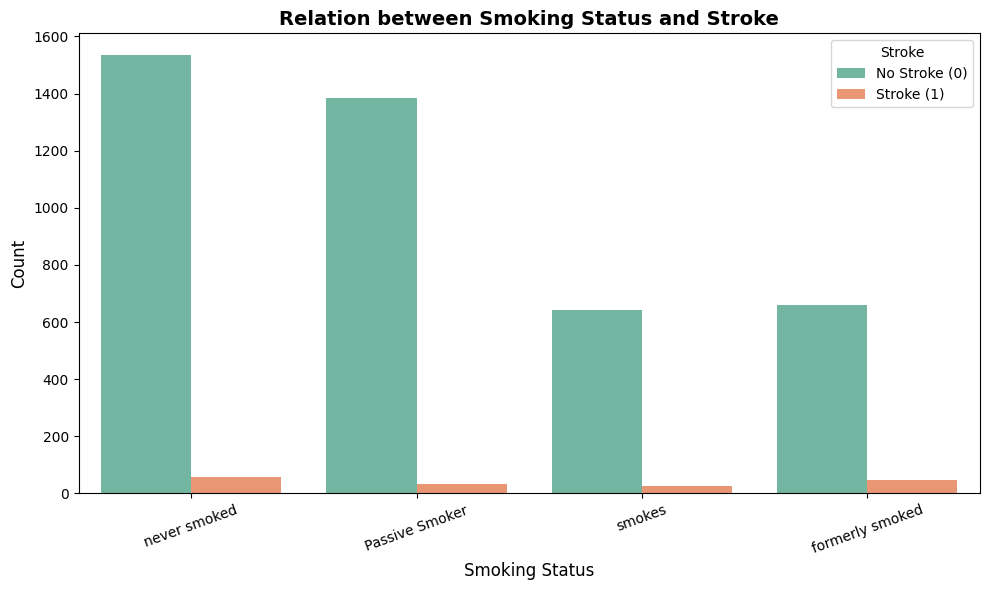

In [279]:
plt.figure(figsize=(10,6))
sns.countplot(data=stroke_dataframe, x='smoking_status', hue='stroke', palette='Set2')

plt.title('Relation between Smoking Status and Stroke', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=20)
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()


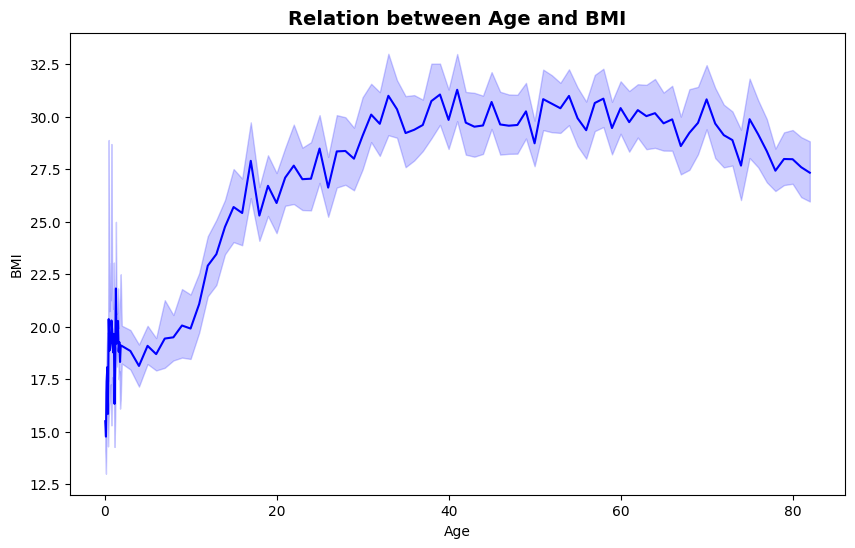

In [280]:
plt.figure(figsize=(10,6))
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=stroke_dataframe, x='age', y='bmi', color='blue')
plt.title('Relation between Age and BMI', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


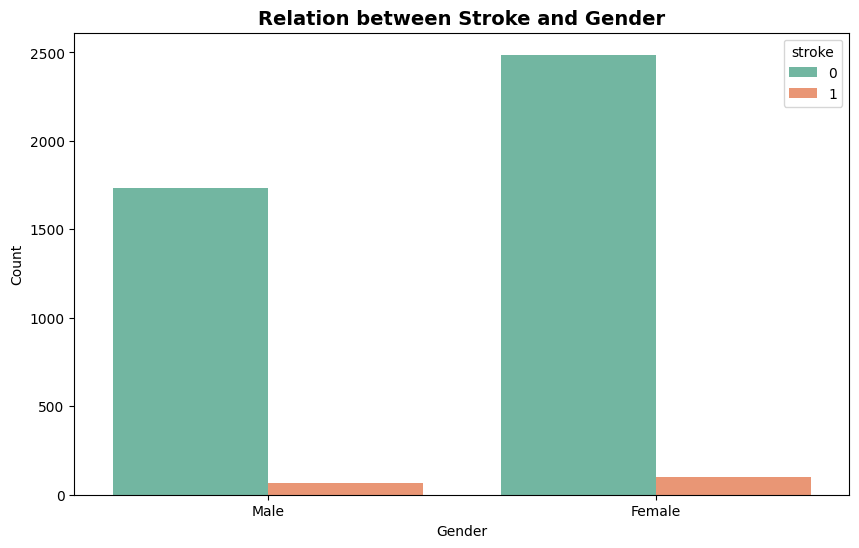

In [281]:
plt.figure(figsize=(10,6))
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=stroke_dataframe, x='gender', hue='stroke', palette='Set2')
plt.title('Relation between Stroke and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


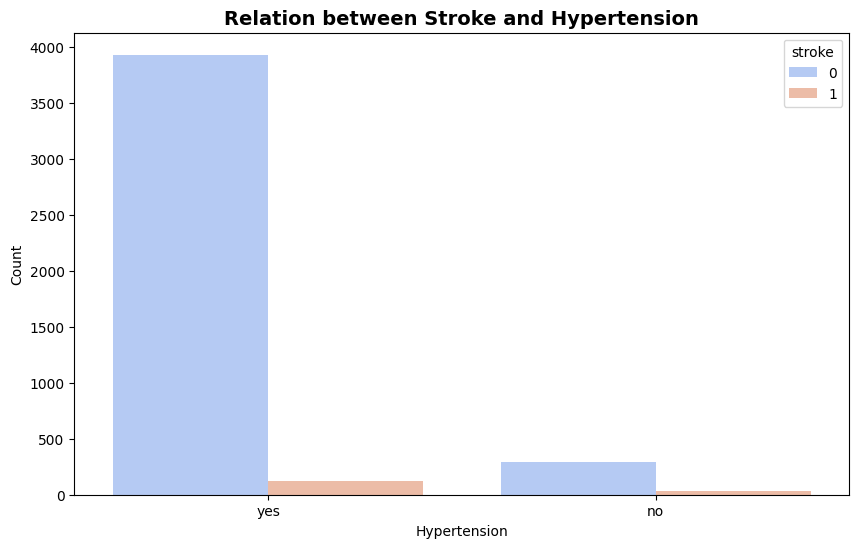

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# نعمل نسخة من العمود مع أسماء بدل الأرقام
stroke_dataframe['hypertension_label'] = stroke_dataframe['hypertension'].replace({0: 'yes', 1: 'no'})

plt.figure(figsize=(10,6))
sns.countplot(data=stroke_dataframe, x='hypertension_label', hue='stroke', palette='coolwarm')
plt.title('Relation between Stroke and Hypertension', fontsize=14, fontweight='bold')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()


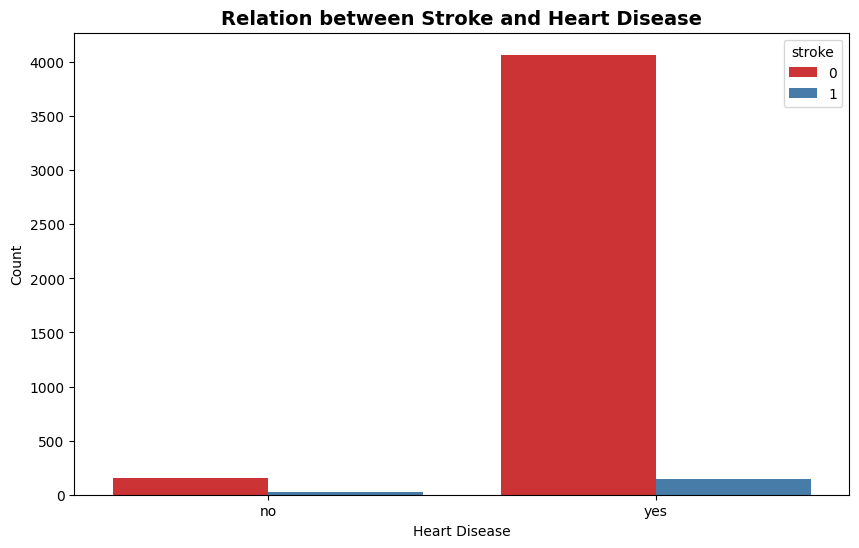

In [283]:
plt.figure(figsize=(10,6))
import seaborn as sns
import matplotlib.pyplot as plt
stroke_dataframe['heart_disease_label'] = stroke_dataframe['heart_disease'].replace({0: 'yes', 1: 'no'})
sns.countplot(data=stroke_dataframe, x='heart_disease_label', hue='stroke', palette='Set1')
plt.title('Relation between Stroke and Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


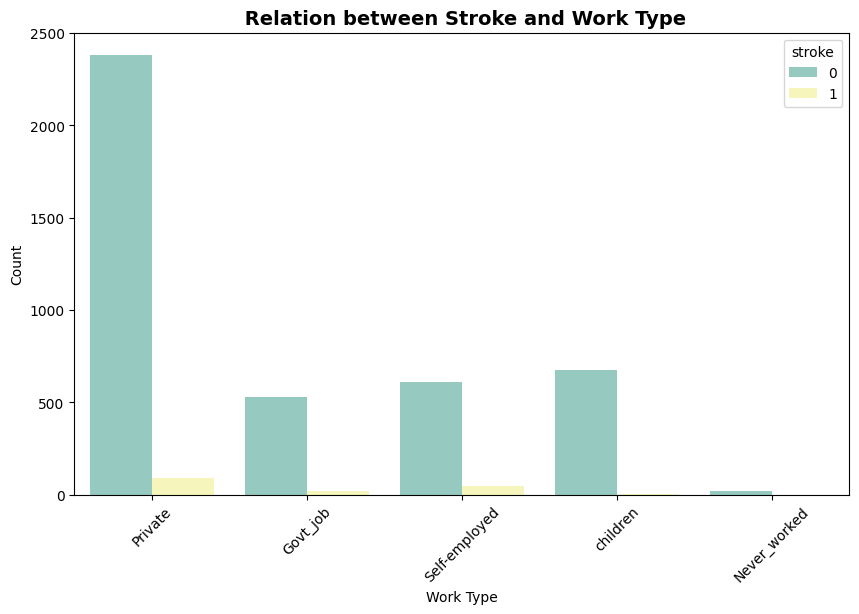

In [284]:
plt.figure(figsize=(10,6))
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=stroke_dataframe, x='work_type', hue='stroke', palette='Set3')
plt.title(' Relation between Stroke and Work Type', fontsize=14, fontweight='bold')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [285]:
stroke_dataframe = stroke_dataframe.drop(columns=['hypertension_label', 'heart_disease_label'])

# Dashboard

In [36]:
#pip install dash

In [37]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
numerical_cols = stroke_dataframe.select_dtypes(include='number').columns.tolist()
categorical_cols = stroke_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
binary_cols = [col for col in stroke_dataframe.columns if stroke_dataframe[col].nunique() == 2]
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H4("Feature explorer"),
    dcc.Dropdown(
        id='feature-type-dropdown',
        options=[
            {'label': 'Numerical', 'value': 'numerical'},
            {'label': 'Categorical', 'value': 'categorical'},
            {'label': 'Binary', 'value': 'binary'}
        ],
        value='numerical',
        clearable=False
    ),
    html.Br(),
    dcc.Dropdown(id='x-axis-dropdown', placeholder="Select X feature", clearable=True),
    html.Br(),
    dcc.Dropdown(id='y-axis-dropdown', placeholder="Select Y feature (optional)", clearable=True),
    html.Br(),
    dcc.Dropdown(id='plot-type-dropdown', placeholder="Select plot type", clearable=False),
    dcc.Graph(id='feature-graph')
])
@app.callback(
    Output('x-axis-dropdown', 'options'),
    Output('y-axis-dropdown', 'options'),
    Output('plot-type-dropdown', 'options'),
    Input('feature-type-dropdown', 'value')
)
def update_feature_options(feature_type):
    if feature_type == 'numerical':
        options = [{'label': col, 'value': col} for col in numerical_cols]
        plot_options = [
            {'label': 'Box Plot', 'value': 'box'},
            {'label': 'Histogram', 'value': 'histogram'},
            {'label': 'Scatter', 'value': 'scatter'}
        ]
    elif feature_type == 'categorical':
        options = [{'label': col, 'value': col} for col in categorical_cols]
        plot_options = [
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Pie Chart', 'value': 'pie'},
            {'label': 'Count Plot', 'value': 'count'}
        ]
    elif feature_type == 'binary':
        options = [{'label': col, 'value': col} for col in binary_cols]
        plot_options = [
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Pie Chart', 'value': 'pie'},
            {'label': 'Count Plot', 'value': 'count'}
        ]
    else:
        options = []
        plot_options = []
    return options, options, plot_options

@app.callback(
    Output('feature-graph', 'figure'),
    Input('x-axis-dropdown', 'value'),
    Input('y-axis-dropdown', 'value'),
    Input('plot-type-dropdown', 'value')
)
def update_graph(x_axis, y_axis, plot_type):
    # default empty figure
    fig = px.scatter()  # empty placeholder

    # guard clauses
    if plot_type is None:
        return fig

    # BOX: usually requires a numeric y or numeric x depending on desired orientation.
    if plot_type == 'box':
        # if both provided, use x as category and y as numeric; if only one numeric provided, plot box of that column
        if x_axis and y_axis:
            fig = px.box(stroke_dataframe, x=x_axis, y=y_axis)
        elif x_axis and x_axis in numerical_cols:
            fig = px.box(stroke_dataframe, y=x_axis)
        else:
            fig = px.scatter()  # cannot make box plot without numeric column

    # HISTOGRAM: single numeric column
    elif plot_type == 'histogram':
        if x_axis:
            # if y provided and numeric, use it as 'color' or as facet; usually histogram uses x only
            fig = px.histogram(stroke_dataframe, x=x_axis)
        else:
            fig = px.histogram(stroke_dataframe)

    # SCATTER: needs both numeric x and numeric y
    elif plot_type == 'scatter':
        if x_axis and y_axis:
            fig = px.scatter(stroke_dataframe, x=x_axis, y=y_axis)
        else:
            fig = px.scatter()  # can't draw scatter without both axes

    # BAR: can be used for aggregations. if both provided, use x as category, y as numeric aggregation
    elif plot_type == 'bar':
        if x_axis and y_axis:
            fig = px.bar(stroke_dataframe, x=x_axis, y=y_axis)
        elif x_axis:
            # counts per category
            vc = stroke_dataframe[x_axis].value_counts().reset_index()
            vc.columns = [x_axis, 'count']
            fig = px.bar(vc, x=x_axis, y='count')
        else:
            fig = px.bar()

    # PIE: typically single categorical column -> counts; or names+values if both provided and y numeric
    elif plot_type == 'pie':
        if x_axis and y_axis and y_axis in numerical_cols:
            fig = px.pie(stroke_dataframe, names=x_axis, values=y_axis)
        elif x_axis:
            vc = stroke_dataframe[x_axis].value_counts().reset_index()
            vc.columns = ['names', 'values']
            fig = px.pie(vc, names='names', values='values')
        else:
            fig = px.pie()

    # COUNT: show counts of x, optionally colored by y (use histogram)
    elif plot_type == 'count':
        if x_axis and y_axis:
            fig = px.histogram(stroke_dataframe, x=x_axis, color=y_axis)
            fig.update_layout(barmode='overlay')
        elif x_axis:
            fig = px.histogram(stroke_dataframe, x=x_axis)
        else:
            fig = px.histogram(stroke_dataframe)

    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8050)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


# Bulding the model

In [286]:
# Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    stroke_dataframe[col] = le.fit_transform(stroke_dataframe[col])
    print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Female': np.int64(0), 'Male': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
{'Rural': np.int64(0), 'Urban': np.int64(1)}
{'Passive Smoker': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}


In [287]:
stroke_dataframe.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [288]:
# split futures and target
X = stroke_dataframe.drop('stroke', axis=1)
y = stroke_dataframe['stroke']

In [289]:
# split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [290]:
# data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [291]:
# GridSearch
from sklearn.model_selection import GridSearchCV
scores = []
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]}}


      ,'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [4,3,7,100]}

        }

      , 'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{'max_depth':[3,4,2]}
        }
}

In [292]:
# GridSearch score table
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

search_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [293]:
search_score
# XGB is the higher accuracy

,model,best_score,best_params
0,random_forest,0.961863,{'n_estimators': 10}
1,logistic_regression,0.963495,{'C': 1}
2,xgboost,0.964145,{'n_estimators': 7}
3,decision_tree,0.963495,{'max_depth': 2}


In [294]:
# train the model
xgb= XGBClassifier(n_estimators=7)
xgb.fit(X_train,y_train)
# model predictions
c=xgb.predict(X_test)

In [295]:
# accuracy metrics
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
y_pred=xgb.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Confusion matrix = {confusion_matrix(y_test,y_pred)}")
print(f"Xgb :{classification_report(y_test, y_pred)}")


Accuracy = 0.9589353612167301
Confusion matrix = [[1258    5]
 [  49    3]]
Xgb :              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1263
           1       0.38      0.06      0.10        52

    accuracy                           0.96      1315
   macro avg       0.67      0.53      0.54      1315
weighted avg       0.94      0.96      0.94      1315



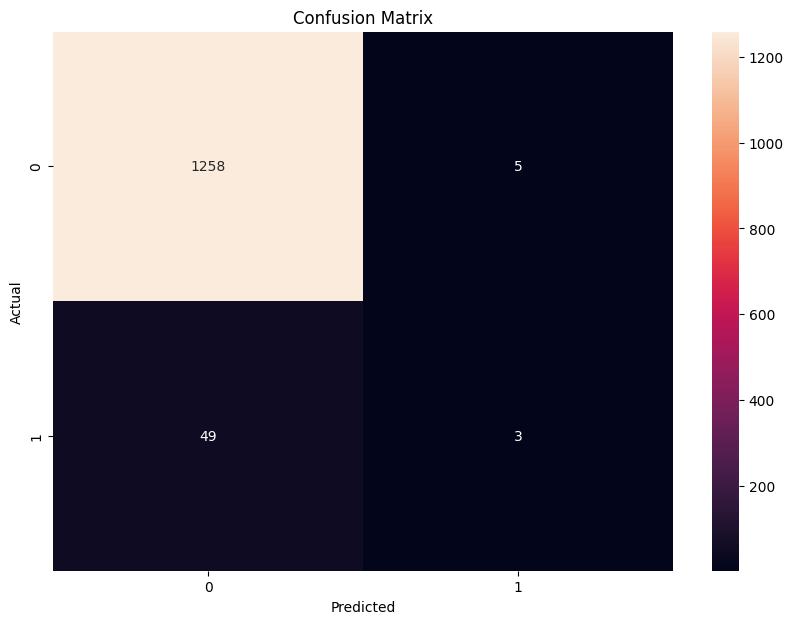

In [296]:
#visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Handling a biased dataset
## Add new dataset

In [297]:
# new data set
stroke_dataframe2=pd.read_csv('/content/stroke_data.csv')
stroke_dataframe2.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [298]:
# data information
stroke_dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [299]:
# check duplicated
stroke_dataframe2.duplicated().sum()

np.int64(0)

In [300]:
# check null data
stroke_dataframe2.isnull().sum()

,0
sex,3
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [301]:
# fill missing value
stroke_dataframe2['sex'].fillna(stroke_dataframe2['sex'].mode()[0],inplace=True)

/tmp/ipython-input-3912720555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_dataframe2['sex'].fillna(stroke_dataframe2['sex'].mode()[0],inplace=True)


In [302]:
# compare two data columns
print(stroke_dataframe2.columns,stroke_dataframe.columns)

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object') Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [303]:
# rename sex coulmn to match Original data
stroke_dataframe2.rename(columns={'sex':'gender'},inplace=True)
stroke_dataframe2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [304]:
stroke_dataframe2['work_type'].head()

,work_type
0,4
1,4
2,4
3,3
4,4


In [305]:
# Re-encode work_type column using a custom mapping dictionary
# Govt_job=0, Never_worked=1, Private=2, Self-employed=3, children=4
# Never_worked=0,children=1, Govt_job=2, Self-employed=3, Private=4
dic={
    0:2,1:0,2:4,3:3,4:1
}
stroke_dataframe2['work_type']=stroke_dataframe2['work_type'].map(dic)
stroke_dataframe2['work_type'].head()

,work_type
0,1
1,1
2,1
3,3
4,1


In [306]:
stroke_dataframe2['Residence_type'].head()

,Residence_type
0,1
1,0
2,1
3,0
4,1


In [307]:
# Re-map Residence_type values: convert 0→1 and 1→0 (swap binary labels)
dic_res={
    0:1,1:0
}
stroke_dataframe2['Residence_type']=stroke_dataframe2['Residence_type'].map(dic_res)
stroke_dataframe2['Residence_type'].head()

,Residence_type
0,0
1,1
2,0
3,1
4,0


In [308]:
stroke_dataframe2['smoking_status'].value_counts()

,count
smoking_status,
0,20921
1,19989


/tmp/ipython-input-2873878320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stroke_dataframe2, x='smoking_status', palette='Set2')
/tmp/ipython-input-2873878320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stroke_dataframe, x='smoking_status', palette='Set3')


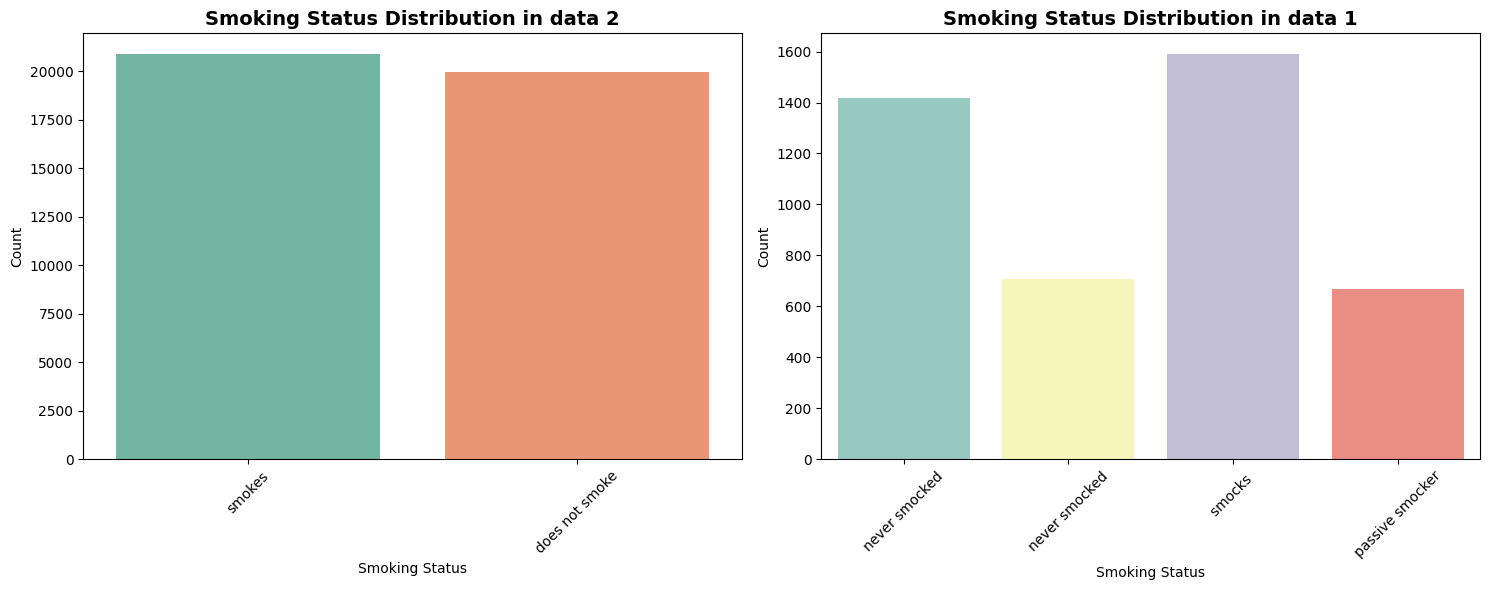

In [309]:
plt.figure(figsize=(15,6))


plt.subplot(1, 2, 1)
sns.countplot(data=stroke_dataframe2, x='smoking_status', palette='Set2')
plt.title('Smoking Status Distribution in data 2', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['smokes', 'does not smoke'], rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=stroke_dataframe, x='smoking_status', palette='Set3')
plt.title('Smoking Status Distribution in data 1', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks([0,1,2,3], ['never smocked', 'never smocked','smocks ','passive smocker'], rotation=45)


plt.tight_layout()
plt.show()

# merge two datasets

In [310]:
# merge the two datasets
stroke_dataframe=pd.concat([stroke_dataframe,stroke_dataframe2],ignore_index=True)
stroke_dataframe.shape

(45293, 11)

/tmp/ipython-input-3366532994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stroke_dataframe, x='stroke', palette='coolwarm')


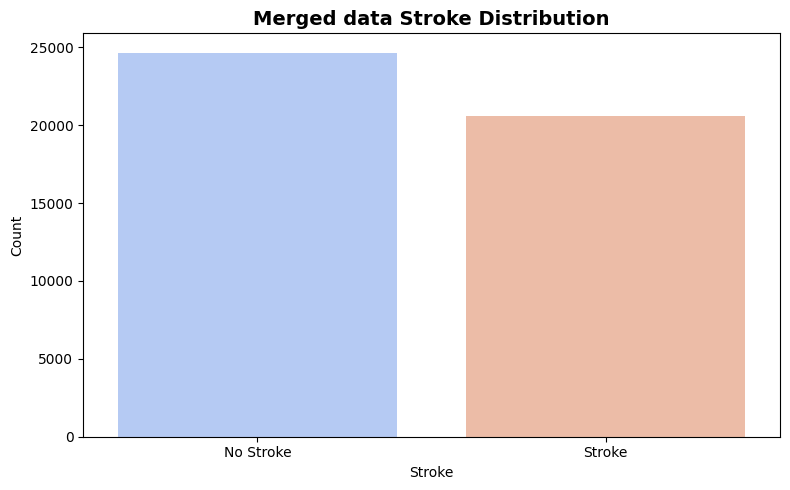

In [311]:
# handling biased target
plt.figure(figsize=(8,5))
sns.countplot(data=stroke_dataframe, x='stroke', palette='coolwarm')

plt.title('Merged data Stroke Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.tight_layout()
plt.show()

# Building new model

In [312]:
# split the data into futures and target
X=stroke_dataframe.drop('stroke', axis=1)
y=stroke_dataframe['stroke']

In [313]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [314]:
#scaling the data
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [315]:
# GridSearch
from sklearn.model_selection import GridSearchCV
scores = []
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]}}


      ,'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [4,3,7,100]}

        }

      , 'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{'max_depth':[3,4,2]}
        }
}

In [316]:
# GridSearch score table
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [317]:
df
# XGB is the higher model acurracy

,model,best_score,best_params
0,random_forest,0.991200,{'n_estimators': 10}
1,logistic_regression,0.689355,{'C': 5}
2,xgboost,0.992556,{'n_estimators': 100}
3,decision_tree,0.714020,{'max_depth': 4}


In [318]:
# train the model
xgb_final= XGBClassifier(n_estimators=100)
xgb_final.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [319]:
# model prediction
y_pred_final=xgb_final.predict(x_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred_final)}")
print(f"Confusion matrix = {confusion_matrix(y_test,y_pred_final)}")
print(f"Xgb :{classification_report(y_test, y_pred_final)}")

Accuracy = 0.9944804239034443
Confusion matrix = [[7413   44]
 [  31 6100]]
Xgb :              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7457
           1       0.99      0.99      0.99      6131

    accuracy                           0.99     13588
   macro avg       0.99      0.99      0.99     13588
weighted avg       0.99      0.99      0.99     13588



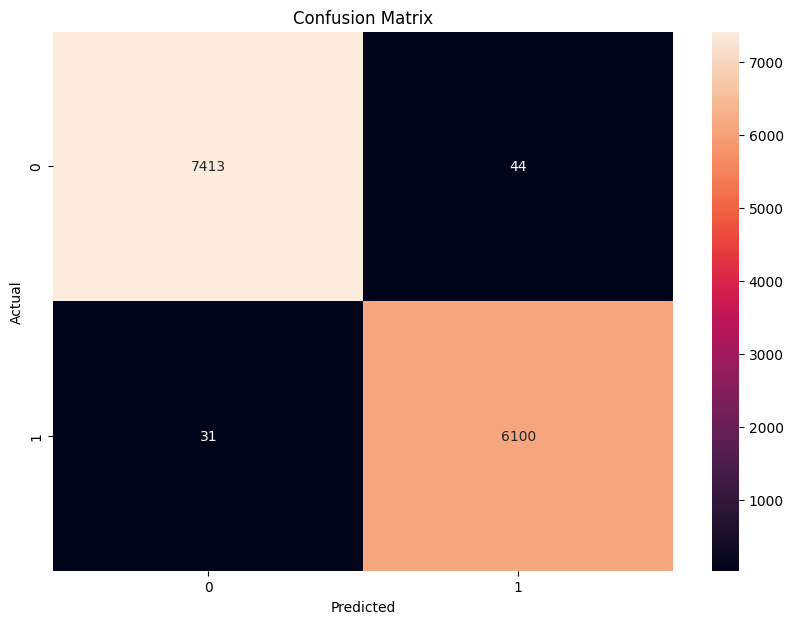

In [320]:
#visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# save the model

In [145]:
import joblib
# Save the model to a file
joblib.dump(xgb_final, 'stroke_prediction_model2.pkl')

['stroke_prediction_model2.pkl']